In [9]:
from algorithm import (
                        NoRegularizationTrainer,
                        GradientTrainer,
                        EGTrainer,
                        CSVDataLoader,
                        MultiTaskModel,
                        MultiTaskDataset,
                        mlt_train_test_split,
                        true_values_from_data_loader,
                        unique_value_counts,
                        Cindex,
                        brier_score,
                        )
import easydict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In this notebook I did the same as the previous one, but with one difference, that is here I only selected 1500 data points for each time bucket randomly.



In [10]:
def plot_unique_values_count(unique_values, counts, title):
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values, counts, tick_label=unique_values)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

Unique Values: tensor([0., 1., 2., 3.])
Counts: tensor([1500, 1500, 1500,  502])


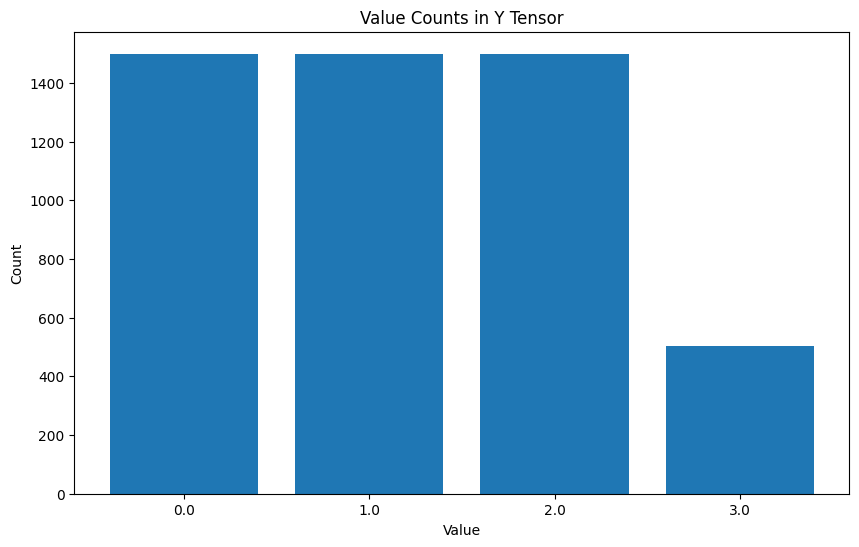

In [15]:
dl = CSVDataLoader()
X, Y, Y_transform, W, W_transform, time_all, event_all = dl.get_balanced_data(num_intervals=4)

unique_values, counts = unique_value_counts(Y.sum(axis=1))
plot_unique_values_count(unique_values, counts, 'Value Counts in Y Tensor')

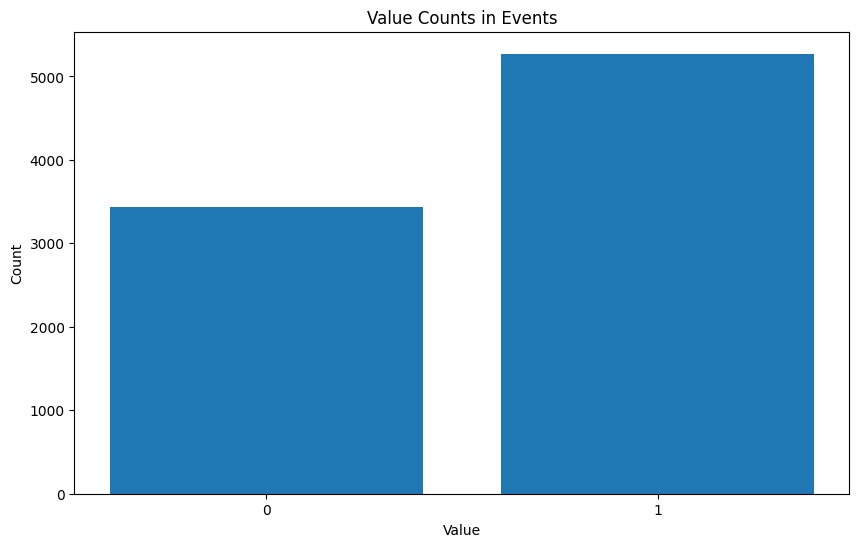

In [12]:

unique_values, counts = np.unique(event_all, return_counts=True)
plot_unique_values_count(unique_values, counts, 'Value Counts in Events')

# Training model with no Regularization

In [4]:
dl = CSVDataLoader()
X, Y, Y_transform, W, W_transform, time_all, event_all = dl.get_data(num_intervals=4)

args = easydict.EasyDict({
    "batch_size": 64,
    "lr": 0.01,
    "epochs": 200,
    "clip": 5.0,
    "lambda_reg": 0.01,
    "save_path": "outputfiles",
    "eg_k" : 5, 
    "early_stop_patience":15,
})


full_dataset = MultiTaskDataset(X, Y_transform, W_transform, event_all)

train_loader, test_loader, train_dataset, test_dataset , in_features, out_features = (
    mlt_train_test_split(full_dataset, range(len(X)), event_all, args.batch_size, ratio=0.25))


model = MultiTaskModel(in_features, out_features)


no_reg_trainer = NoRegularizationTrainer(model,train_loader,test_loader,args)
no_reg_trainer.train()



  0%|          | 1/200 [00:02<08:47,  2.65s/it]

End of Epoch 0, Average Training Loss: 1.4703, Average Gradient Norm: 1.9569
End of Epoch 0, Average Validation Loss: 1.2863
Current Learning Rate: 0.010000


  1%|          | 2/200 [00:03<05:44,  1.74s/it]

End of Epoch 1, Average Training Loss: 1.0875, Average Gradient Norm: 1.7140
End of Epoch 1, Average Validation Loss: 1.0821
Current Learning Rate: 0.010000


  2%|▏         | 3/200 [00:04<04:46,  1.45s/it]

End of Epoch 2, Average Training Loss: 1.0525, Average Gradient Norm: 1.7704
End of Epoch 2, Average Validation Loss: 1.2180
Current Learning Rate: 0.010000


  2%|▏         | 4/200 [00:06<04:25,  1.36s/it]

End of Epoch 3, Average Training Loss: 1.0261, Average Gradient Norm: 1.6852
End of Epoch 3, Average Validation Loss: 1.2953
Current Learning Rate: 0.010000


  2%|▎         | 5/200 [00:07<04:23,  1.35s/it]

End of Epoch 4, Average Training Loss: 1.0225, Average Gradient Norm: 1.7405
End of Epoch 4, Average Validation Loss: 1.0683
Current Learning Rate: 0.010000


  3%|▎         | 6/200 [00:08<04:24,  1.36s/it]

End of Epoch 5, Average Training Loss: 1.0343, Average Gradient Norm: 1.7949
End of Epoch 5, Average Validation Loss: 1.2788
Current Learning Rate: 0.010000


  4%|▎         | 7/200 [00:10<04:18,  1.34s/it]

End of Epoch 6, Average Training Loss: 1.0698, Average Gradient Norm: 1.7006
End of Epoch 6, Average Validation Loss: 1.0189
Current Learning Rate: 0.010000


  4%|▍         | 8/200 [00:11<04:08,  1.29s/it]

End of Epoch 7, Average Training Loss: 1.0223, Average Gradient Norm: 1.7272
End of Epoch 7, Average Validation Loss: 1.3303
Current Learning Rate: 0.010000


  4%|▍         | 9/200 [00:12<04:13,  1.33s/it]

End of Epoch 8, Average Training Loss: 0.9993, Average Gradient Norm: 1.7455
End of Epoch 8, Average Validation Loss: 1.0701
Current Learning Rate: 0.010000


  5%|▌         | 10/200 [00:13<04:05,  1.29s/it]

End of Epoch 9, Average Training Loss: 1.0012, Average Gradient Norm: 1.8032
End of Epoch 9, Average Validation Loss: 1.1405
Current Learning Rate: 0.010000


  6%|▌         | 11/200 [00:15<04:00,  1.27s/it]

End of Epoch 10, Average Training Loss: 1.0404, Average Gradient Norm: 1.8037
End of Epoch 10, Average Validation Loss: 1.1259
Current Learning Rate: 0.010000


  6%|▌         | 12/200 [00:16<03:58,  1.27s/it]

End of Epoch 11, Average Training Loss: 1.0375, Average Gradient Norm: 1.8242
End of Epoch 11, Average Validation Loss: 1.1587
Current Learning Rate: 0.010000


  6%|▋         | 13/200 [00:17<03:56,  1.26s/it]

End of Epoch 12, Average Training Loss: 1.0072, Average Gradient Norm: 1.8195
End of Epoch 12, Average Validation Loss: 1.0667
Current Learning Rate: 0.001000


  7%|▋         | 14/200 [00:19<04:01,  1.30s/it]

End of Epoch 13, Average Training Loss: 0.9645, Average Gradient Norm: 1.5364
End of Epoch 13, Average Validation Loss: 1.0880
Current Learning Rate: 0.001000


  8%|▊         | 15/200 [00:20<03:58,  1.29s/it]

End of Epoch 14, Average Training Loss: 0.9411, Average Gradient Norm: 1.5992
End of Epoch 14, Average Validation Loss: 1.0735
Current Learning Rate: 0.001000


  8%|▊         | 16/200 [00:21<03:54,  1.28s/it]

End of Epoch 15, Average Training Loss: 0.9184, Average Gradient Norm: 1.6371
End of Epoch 15, Average Validation Loss: 1.0918
Current Learning Rate: 0.001000


  8%|▊         | 17/200 [00:22<03:52,  1.27s/it]

End of Epoch 16, Average Training Loss: 0.9071, Average Gradient Norm: 1.7722
End of Epoch 16, Average Validation Loss: 1.0803
Current Learning Rate: 0.001000


  9%|▉         | 18/200 [00:24<03:50,  1.27s/it]

End of Epoch 17, Average Training Loss: 0.9147, Average Gradient Norm: 1.8513
End of Epoch 17, Average Validation Loss: 1.1091
Current Learning Rate: 0.001000


 10%|▉         | 19/200 [00:25<03:53,  1.29s/it]

End of Epoch 18, Average Training Loss: 0.9022, Average Gradient Norm: 1.9310
End of Epoch 18, Average Validation Loss: 1.0696
Current Learning Rate: 0.000100


 10%|█         | 20/200 [00:26<03:50,  1.28s/it]

End of Epoch 19, Average Training Loss: 0.8849, Average Gradient Norm: 1.8870
End of Epoch 19, Average Validation Loss: 1.0741
Current Learning Rate: 0.000100


 10%|█         | 21/200 [00:27<03:49,  1.28s/it]

End of Epoch 20, Average Training Loss: 0.8946, Average Gradient Norm: 1.8884
End of Epoch 20, Average Validation Loss: 1.0680
Current Learning Rate: 0.000100


 10%|█         | 21/200 [00:29<04:08,  1.39s/it]

End of Epoch 21, Average Training Loss: 0.9014, Average Gradient Norm: 1.8268
End of Epoch 21, Average Validation Loss: 1.0685
Current Learning Rate: 0.000100
Early stopping triggered after 22 epochs.


## Evaluating model with no regularization on test data

In [5]:
no_reg_trainer.load_best_checkpoint()
test_predictions, Y_hat_test = no_reg_trainer.predict(test_loader)
print("Y_hat_test")
unique_value_counts(Y_hat_test)



events_test, Y_true_test = true_values_from_data_loader(test_loader)
print("Y_true_test")
unique_value_counts(Y_true_test)



cindex_calculator = Cindex()
cindex_test = cindex_calculator(Y_true_test, Y_hat_test, events_test)
bscore_test = brier_score(event_all, Y, events_test, Y_true_test, test_predictions)

print(f"Test Data C-Index = {cindex_test},  BScore = {bscore_test}")



print(classification_report(Y_true_test.cpu(), Y_hat_test.cpu()))

Loaded model from checkpoint at epoch 2 with best validation loss 1.0330
Y_hat_test
Unique Values: tensor([0., 1., 2., 3., 4., 5., 7.])
Counts: tensor([ 886,  786,  218,  614,   56,    1, 1087])
Y_true_test
Unique Values: tensor([0., 1., 2., 3., 4., 5., 6., 7.])
Counts: tensor([1026, 1009,  404,  507,  406,  214,   64,   18])


100%|██████████| 3648/3648 [00:02<00:00, 1323.66it/s]


Test Data C-Index = 0.9812822937965393,  BScore = 0.06734819062242402
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1026
         1.0       0.80      0.63      0.70      1009
         2.0       0.28      0.15      0.19       404
         3.0       0.24      0.30      0.27       507
         4.0       0.20      0.03      0.05       406
         5.0       0.00      0.00      0.00       214
         6.0       0.00      0.00      0.00        64
         7.0       0.01      0.89      0.03        18

    accuracy                           0.48      3648
   macro avg       0.32      0.35      0.27      3648
weighted avg       0.59      0.48      0.52      3648


C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training model with Expected Gradient

In [6]:
dl = CSVDataLoader()
X, Y, Y_transform, W, W_transform, time_all, event_all = dl.get_data()

args = easydict.EasyDict({
    "batch_size": 64,
    "lr": 0.01,
    "epochs": 200,
    "clip": 5.0,
    "lambda_reg": 0.01,
    "save_path": "outputfiles",
    "eg_k" : 5, 
    "early_stop_patience":15,
})


full_dataset = MultiTaskDataset(X, Y_transform, W_transform, event_all)

train_loader, test_loader, train_dataset, test_dataset , in_features, out_features = (
    mlt_train_test_split(full_dataset, range(len(X)), event_all, args.batch_size, ratio=0.25))


model = MultiTaskModel(in_features, out_features)


eg_trainer = EGTrainer(model, train_loader, test_loader, train_dataset, args)
eg_trainer.train()





  0%|          | 1/200 [00:16<54:55, 16.56s/it]

End of Epoch 0, Average Training Loss: 2.0659, Average Gradient Norm: 2.5205
End of Epoch 0, Average Validation Loss: 1.8185
Current Learning Rate: 0.010000


  1%|          | 2/200 [00:32<54:24, 16.49s/it]

End of Epoch 1, Average Training Loss: 1.6973, Average Gradient Norm: 3.0070
End of Epoch 1, Average Validation Loss: 1.1477
Current Learning Rate: 0.010000
End of Epoch 2, Average Training Loss: 1.6456, Average Gradient Norm: 3.2199


  2%|▏         | 3/200 [00:49<54:11, 16.50s/it]

End of Epoch 2, Average Validation Loss: 1.2862
Current Learning Rate: 0.010000
End of Epoch 3, Average Training Loss: 1.6136, Average Gradient Norm: 3.0914
End of Epoch 3, Average Validation Loss: 1.2486
Current Learning Rate: 0.010000


  2%|▏         | 4/200 [01:06<54:27, 16.67s/it]

End of Epoch 4, Average Training Loss: 1.5975, Average Gradient Norm: 3.7201
End of Epoch 4, Average Validation Loss: 1.2724
Current Learning Rate: 0.010000


  3%|▎         | 6/200 [01:40<54:27, 16.84s/it]

End of Epoch 5, Average Training Loss: 1.6180, Average Gradient Norm: 3.6658
End of Epoch 5, Average Validation Loss: 1.2366
Current Learning Rate: 0.010000
End of Epoch 6, Average Training Loss: 1.5914, Average Gradient Norm: 3.4674


  4%|▎         | 7/200 [01:56<53:45, 16.71s/it]

End of Epoch 6, Average Validation Loss: 1.2106
Current Learning Rate: 0.010000


  4%|▍         | 8/200 [02:12<52:50, 16.51s/it]

End of Epoch 7, Average Training Loss: 1.6076, Average Gradient Norm: 3.6206
End of Epoch 7, Average Validation Loss: 1.3031
Current Learning Rate: 0.001000
End of Epoch 8, Average Training Loss: 1.4858, Average Gradient Norm: 3.0547


  4%|▍         | 9/200 [02:30<53:11, 16.71s/it]

End of Epoch 8, Average Validation Loss: 1.1406
Current Learning Rate: 0.001000
End of Epoch 9, Average Training Loss: 1.4730, Average Gradient Norm: 3.5422


  5%|▌         | 10/200 [02:48<54:23, 17.17s/it]

End of Epoch 9, Average Validation Loss: 1.0806
Current Learning Rate: 0.001000
End of Epoch 10, Average Training Loss: 1.4651, Average Gradient Norm: 3.6640


  6%|▌         | 11/200 [03:09<58:04, 18.43s/it]

End of Epoch 10, Average Validation Loss: 1.1073
Current Learning Rate: 0.001000
End of Epoch 11, Average Training Loss: 1.4568, Average Gradient Norm: 3.9771


  6%|▌         | 12/200 [03:31<1:00:40, 19.37s/it]

End of Epoch 11, Average Validation Loss: 1.0599
Current Learning Rate: 0.001000
End of Epoch 12, Average Training Loss: 1.4428, Average Gradient Norm: 4.0515


  6%|▋         | 13/200 [03:52<1:02:20, 20.00s/it]

End of Epoch 12, Average Validation Loss: 1.1065
Current Learning Rate: 0.001000
End of Epoch 13, Average Training Loss: 1.4561, Average Gradient Norm: 4.3082


  7%|▋         | 14/200 [04:14<1:03:22, 20.44s/it]

End of Epoch 13, Average Validation Loss: 1.0943
Current Learning Rate: 0.001000


  8%|▊         | 15/200 [04:33<1:02:07, 20.15s/it]

End of Epoch 14, Average Training Loss: 1.4548, Average Gradient Norm: 4.3138
End of Epoch 14, Average Validation Loss: 1.1172
Current Learning Rate: 0.001000


  8%|▊         | 16/200 [04:49<58:17, 19.01s/it]  

End of Epoch 15, Average Training Loss: 1.4530, Average Gradient Norm: 4.9294
End of Epoch 15, Average Validation Loss: 1.0796
Current Learning Rate: 0.001000


  8%|▊         | 17/200 [05:06<55:39, 18.25s/it]

End of Epoch 16, Average Training Loss: 1.4438, Average Gradient Norm: 4.6235
End of Epoch 16, Average Validation Loss: 1.0793
Current Learning Rate: 0.001000


  9%|▉         | 18/200 [05:23<54:00, 17.81s/it]

End of Epoch 17, Average Training Loss: 1.4485, Average Gradient Norm: 4.8131
End of Epoch 17, Average Validation Loss: 1.0658
Current Learning Rate: 0.000100
End of Epoch 18, Average Training Loss: 1.4210, Average Gradient Norm: 4.4166


 10%|▉         | 19/200 [05:42<55:00, 18.23s/it]

End of Epoch 18, Average Validation Loss: 1.0748
Current Learning Rate: 0.000100
End of Epoch 19, Average Training Loss: 1.4232, Average Gradient Norm: 4.6056


 10%|█         | 20/200 [06:03<57:41, 19.23s/it]

End of Epoch 19, Average Validation Loss: 1.0744
Current Learning Rate: 0.000100
End of Epoch 20, Average Training Loss: 1.4306, Average Gradient Norm: 4.7157


 10%|█         | 21/200 [06:25<59:11, 19.84s/it]

End of Epoch 20, Average Validation Loss: 1.0787
Current Learning Rate: 0.000100


 11%|█         | 22/200 [06:42<56:25, 19.02s/it]

End of Epoch 21, Average Training Loss: 1.4188, Average Gradient Norm: 4.8172
End of Epoch 21, Average Validation Loss: 1.0778
Current Learning Rate: 0.000100
End of Epoch 22, Average Training Loss: 1.4230, Average Gradient Norm: 4.9209


 12%|█▏        | 23/200 [06:58<53:49, 18.25s/it]

End of Epoch 22, Average Validation Loss: 1.0808
Current Learning Rate: 0.000100
End of Epoch 23, Average Training Loss: 1.4176, Average Gradient Norm: 4.8338


 12%|█▏        | 24/200 [07:15<52:09, 17.78s/it]

End of Epoch 23, Average Validation Loss: 1.0835
Current Learning Rate: 0.000010


 12%|█▎        | 25/200 [07:32<50:52, 17.44s/it]

End of Epoch 24, Average Training Loss: 1.4209, Average Gradient Norm: 4.6443
End of Epoch 24, Average Validation Loss: 1.0824
Current Learning Rate: 0.000010


 13%|█▎        | 26/200 [07:49<50:24, 17.38s/it]

End of Epoch 25, Average Training Loss: 1.4199, Average Gradient Norm: 4.6849
End of Epoch 25, Average Validation Loss: 1.0808
Current Learning Rate: 0.000010


 13%|█▎        | 26/200 [08:06<54:15, 18.71s/it]

End of Epoch 26, Average Training Loss: 1.4329, Average Gradient Norm: 4.8156
End of Epoch 26, Average Validation Loss: 1.0765
Current Learning Rate: 0.000010
Early stopping triggered after 27 epochs.


## Evaluating model with expected gradient on test data

In [8]:
eg_trainer.load_best_checkpoint()
test_predictions, Y_hat_test = eg_trainer.predict(test_loader)
print("Y_hat_test")
unique_value_counts(Y_hat_test)

events_test, Y_true_test = true_values_from_data_loader(test_loader)
print("Y_true_test")
unique_value_counts(Y_true_test)


cindex_calculator = Cindex()
cindex_test = cindex_calculator(Y_true_test, Y_hat_test, events_test)
bscore_test = brier_score(event_all, Y, events_test, Y_true_test, test_predictions)

print(f"Test Data C-Index = {cindex_test},  BScore = {bscore_test}")


print("Default model")
print(classification_report(Y_true_test.cpu(), Y_hat_test.cpu()))

Loaded model from checkpoint at epoch 12 with best validation loss 1.0599
Y_hat_test
Unique Values: tensor([0., 1., 2., 3., 4., 7.])
Counts: tensor([ 920,  892,  406,  286,   33, 1111])
Y_true_test
Unique Values: tensor([0., 1., 2., 3., 4., 5., 6., 7.])
Counts: tensor([1026, 1009,  404,  507,  406,  214,   64,   18])


100%|██████████| 3648/3648 [00:02<00:00, 1745.86it/s]


Test Data C-Index = 0.9749059677124023,  BScore = 0.06895303666053734
Default model
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90      1026
         1.0       0.76      0.67      0.71      1009
         2.0       0.26      0.26      0.26       404
         3.0       0.21      0.12      0.15       507
         4.0       0.27      0.02      0.04       406
         5.0       0.00      0.00      0.00       214
         6.0       0.00      0.00      0.00        64
         7.0       0.01      0.89      0.03        18

    accuracy                           0.48      3648
   macro avg       0.31      0.35      0.26      3648
weighted avg       0.57      0.48      0.51      3648


C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training model with gradient attribution

In [7]:
dl = CSVDataLoader()
X, Y, Y_transform, W, W_transform, time_all, event_all = dl.get_data()

args = easydict.EasyDict({
    "batch_size": 64,
    "lr": 0.01,
    "epochs": 200,
    "clip": 5.0,
    "lambda_reg": 0.01,
    "save_path": "outputfiles",
    "eg_k" : 5, 
    "early_stop_patience":15,
})


full_dataset = MultiTaskDataset(X, Y_transform, W_transform, event_all)

train_loader, test_loader, train_dataset, test_dataset , in_features, out_features = (
    mlt_train_test_split(full_dataset, range(len(X)), event_all, args.batch_size, ratio=0.25))


model = MultiTaskModel(in_features, out_features)


g_trainer = GradientTrainer(model, train_loader, test_loader, args)
g_trainer.train()





  0%|          | 0/200 [00:00<?, ?it/s]

End of Epoch 0, Average Training Loss: 2.3949, Average Gradient Norm: 5.0910


  0%|          | 1/200 [00:05<17:48,  5.37s/it]

End of Epoch 0, Average Validation Loss: 1.9867
Current Learning Rate: 0.010000
End of Epoch 1, Average Training Loss: 2.0117, Average Gradient Norm: 6.9778


  1%|          | 2/200 [00:10<17:06,  5.18s/it]

End of Epoch 1, Average Validation Loss: 1.8260
Current Learning Rate: 0.010000
End of Epoch 2, Average Training Loss: 1.9600, Average Gradient Norm: 8.0274


  2%|▏         | 3/200 [00:15<16:45,  5.10s/it]

End of Epoch 2, Average Validation Loss: 1.8527
Current Learning Rate: 0.010000
End of Epoch 3, Average Training Loss: 1.9495, Average Gradient Norm: 8.3735


  2%|▏         | 4/200 [00:20<16:42,  5.12s/it]

End of Epoch 3, Average Validation Loss: 1.8412
Current Learning Rate: 0.010000
End of Epoch 4, Average Training Loss: 1.9374, Average Gradient Norm: 8.7104


  2%|▎         | 5/200 [00:25<16:47,  5.17s/it]

End of Epoch 4, Average Validation Loss: 1.8354
Current Learning Rate: 0.010000
End of Epoch 5, Average Training Loss: 1.9209, Average Gradient Norm: 9.2171


  3%|▎         | 6/200 [00:30<16:28,  5.09s/it]

End of Epoch 5, Average Validation Loss: 1.8694
Current Learning Rate: 0.010000
End of Epoch 6, Average Training Loss: 1.9367, Average Gradient Norm: 9.3261


  4%|▎         | 7/200 [00:35<16:19,  5.08s/it]

End of Epoch 6, Average Validation Loss: 1.7926
Current Learning Rate: 0.010000
End of Epoch 7, Average Training Loss: 1.9249, Average Gradient Norm: 9.0586


  4%|▍         | 8/200 [00:41<16:26,  5.14s/it]

End of Epoch 7, Average Validation Loss: 1.7612
Current Learning Rate: 0.010000
End of Epoch 8, Average Training Loss: 1.9163, Average Gradient Norm: 9.6302


  4%|▍         | 9/200 [00:46<16:37,  5.22s/it]

End of Epoch 8, Average Validation Loss: 1.7963
Current Learning Rate: 0.010000
End of Epoch 9, Average Training Loss: 1.9141, Average Gradient Norm: 9.6691


  5%|▌         | 10/200 [00:51<16:34,  5.24s/it]

End of Epoch 9, Average Validation Loss: 1.8498
Current Learning Rate: 0.010000
End of Epoch 10, Average Training Loss: 1.9292, Average Gradient Norm: 9.3948


  6%|▌         | 11/200 [00:57<16:30,  5.24s/it]

End of Epoch 10, Average Validation Loss: 1.8627
Current Learning Rate: 0.010000
End of Epoch 11, Average Training Loss: 1.9146, Average Gradient Norm: 9.7801


  6%|▌         | 12/200 [01:02<16:29,  5.27s/it]

End of Epoch 11, Average Validation Loss: 1.7761
Current Learning Rate: 0.010000
End of Epoch 12, Average Training Loss: 1.9279, Average Gradient Norm: 9.1245
End of Epoch 12, Average Validation Loss: 1.7805
Current Learning Rate: 0.010000


  7%|▋         | 14/200 [01:08<12:56,  4.17s/it]

End of Epoch 13, Average Training Loss: 1.9044, Average Gradient Norm: 10.2003
End of Epoch 13, Average Validation Loss: 1.7960
Current Learning Rate: 0.001000


  8%|▊         | 15/200 [01:11<11:11,  3.63s/it]

End of Epoch 14, Average Training Loss: 1.8138, Average Gradient Norm: 11.4115
End of Epoch 14, Average Validation Loss: 1.8056
Current Learning Rate: 0.001000


  8%|▊         | 16/200 [01:13<10:05,  3.29s/it]

End of Epoch 15, Average Training Loss: 1.7923, Average Gradient Norm: 12.9040
End of Epoch 15, Average Validation Loss: 1.7927
Current Learning Rate: 0.001000


  8%|▊         | 17/200 [01:16<09:12,  3.02s/it]

End of Epoch 16, Average Training Loss: 1.7834, Average Gradient Norm: 13.6541
End of Epoch 16, Average Validation Loss: 1.7811
Current Learning Rate: 0.001000


  9%|▉         | 18/200 [01:18<08:47,  2.90s/it]

End of Epoch 17, Average Training Loss: 1.7741, Average Gradient Norm: 15.1658
End of Epoch 17, Average Validation Loss: 1.7783
Current Learning Rate: 0.001000


 10%|▉         | 19/200 [01:21<08:19,  2.76s/it]

End of Epoch 18, Average Training Loss: 1.7655, Average Gradient Norm: 15.5431
End of Epoch 18, Average Validation Loss: 1.7768
Current Learning Rate: 0.001000


 10%|█         | 20/200 [01:23<07:54,  2.64s/it]

End of Epoch 19, Average Training Loss: 1.7694, Average Gradient Norm: 16.6159
End of Epoch 19, Average Validation Loss: 1.7825
Current Learning Rate: 0.000100


 10%|█         | 21/200 [01:25<07:36,  2.55s/it]

End of Epoch 20, Average Training Loss: 1.7542, Average Gradient Norm: 16.5289
End of Epoch 20, Average Validation Loss: 1.7817
Current Learning Rate: 0.000100
End of Epoch 21, Average Training Loss: 1.7614, Average Gradient Norm: 17.5387


 11%|█         | 22/200 [01:28<07:28,  2.52s/it]

End of Epoch 21, Average Validation Loss: 1.7773
Current Learning Rate: 0.000100


 12%|█▏        | 23/200 [01:30<07:17,  2.47s/it]

End of Epoch 22, Average Training Loss: 1.7503, Average Gradient Norm: 17.8139
End of Epoch 22, Average Validation Loss: 1.7777
Current Learning Rate: 0.000100


 12%|█▏        | 24/200 [01:33<07:10,  2.45s/it]

End of Epoch 23, Average Training Loss: 1.7527, Average Gradient Norm: 17.3222
End of Epoch 23, Average Validation Loss: 1.7747
Current Learning Rate: 0.000100


 12%|█▎        | 25/200 [01:35<07:05,  2.43s/it]

End of Epoch 24, Average Training Loss: 1.7545, Average Gradient Norm: 18.2988
End of Epoch 24, Average Validation Loss: 1.7781
Current Learning Rate: 0.000100


 13%|█▎        | 26/200 [01:37<06:59,  2.41s/it]

End of Epoch 25, Average Training Loss: 1.7476, Average Gradient Norm: 18.4203
End of Epoch 25, Average Validation Loss: 1.7816
Current Learning Rate: 0.000010


 14%|█▎        | 27/200 [01:40<06:57,  2.42s/it]

End of Epoch 26, Average Training Loss: 1.7458, Average Gradient Norm: 16.9037
End of Epoch 26, Average Validation Loss: 1.7810
Current Learning Rate: 0.000010


 14%|█▍        | 28/200 [01:42<06:53,  2.41s/it]

End of Epoch 27, Average Training Loss: 1.7441, Average Gradient Norm: 18.7480
End of Epoch 27, Average Validation Loss: 1.7807
Current Learning Rate: 0.000010


 14%|█▍        | 29/200 [01:44<06:49,  2.40s/it]

End of Epoch 28, Average Training Loss: 1.7460, Average Gradient Norm: 17.7923
End of Epoch 28, Average Validation Loss: 1.7806
Current Learning Rate: 0.000010


 15%|█▌        | 30/200 [01:47<06:46,  2.39s/it]

End of Epoch 29, Average Training Loss: 1.7484, Average Gradient Norm: 18.1760
End of Epoch 29, Average Validation Loss: 1.7803
Current Learning Rate: 0.000010


 16%|█▌        | 31/200 [01:49<06:45,  2.40s/it]

End of Epoch 30, Average Training Loss: 1.7472, Average Gradient Norm: 18.7273
End of Epoch 30, Average Validation Loss: 1.7805
Current Learning Rate: 0.000010


 16%|█▌        | 32/200 [01:52<06:39,  2.38s/it]

End of Epoch 31, Average Training Loss: 1.7565, Average Gradient Norm: 18.5375
End of Epoch 31, Average Validation Loss: 1.7794
Current Learning Rate: 0.000001


 16%|█▌        | 32/200 [01:54<10:01,  3.58s/it]

End of Epoch 32, Average Training Loss: 1.7473, Average Gradient Norm: 16.1247
End of Epoch 32, Average Validation Loss: 1.7794
Current Learning Rate: 0.000001
Early stopping triggered after 33 epochs.


## Evaluating model with gradient attribution on test data


In [8]:
g_trainer.load_best_checkpoint()
test_predictions, Y_hat_test = g_trainer.predict(test_loader)
print("Y_hat_test")
unique_value_counts(Y_hat_test)

events_test, Y_true_test = true_values_from_data_loader(test_loader)
print("Y_true_test")
unique_value_counts(Y_true_test)


cindex_calculator = Cindex()
cindex_test = cindex_calculator(Y_true_test, Y_hat_test, events_test)
bscore_test = brier_score(event_all, Y, events_test, Y_true_test, test_predictions)

print(f"Test Data C-Index = {cindex_test},  BScore = {bscore_test}")


print(classification_report(Y_true_test.cpu(), Y_hat_test.cpu()))

Loaded model from checkpoint at epoch 8 with best validation loss 1.7612
Y_hat_test
Unique Values: tensor([0., 2., 3., 4.])
Counts: tensor([1844,   15,  621, 1168])
Y_true_test
Unique Values: tensor([0., 1., 2., 3., 4., 5., 6., 7.])
Counts: tensor([1026, 1009,  404,  507,  406,  214,   64,   18])


100%|██████████| 3648/3648 [00:01<00:00, 1920.00it/s]


Test Data C-Index = 0.9794260859489441,  BScore = 0.13701315474142722
              precision    recall  f1-score   support

         0.0       0.48      0.86      0.61      1026
         1.0       0.00      0.00      0.00      1009
         2.0       0.40      0.01      0.03       404
         3.0       0.21      0.25      0.23       507
         4.0       0.25      0.73      0.37       406
         5.0       0.00      0.00      0.00       214
         6.0       0.00      0.00      0.00        64
         7.0       0.00      0.00      0.00        18

    accuracy                           0.36      3648
   macro avg       0.17      0.23      0.16      3648
weighted avg       0.24      0.36      0.25      3648


C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atlas\anaconda3\envs\future\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
